In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

In [2]:
#datadirec="/Users/kmarvel/Documents/DATA/dansgaard/RUNS/"
datadirec="/Volumes/SahelData/LGM/"
piCfile=datadirec+'dansgaard/ANN1950-1979.aijW3anl_00PI.nc'
LGMfile= datadirec+'dansgaard/ANN1950-1979.aijW3rfanl_21kl.nc'
FullLGMfile= datadirec+'dansgaard/ANN1950-1969.aijW3anl_21kl.nc'

#cpdirec="/Volumes/SahelData/LGM/dansgaard/"


In [3]:
fLGM=cdms.open(LGMfile)
TOA_LGM=fLGM("net_rad_planet")
tsurf_LGM=fLGM("tsurf")

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)


In [4]:
fpiC=cdms.open(piCfile)
TOA_piC=fpiC("net_rad_planet")
tsurf_piC=fpiC("tsurf")
delta_TOA=TOA_LGM-TOA_piC
delta_tsurf=tsurf_LGM-tsurf_piC

In [5]:
#Full LGM temperature
ffull=cdms.open(FullLGMfile)
TOA_fullLGM=ffull("net_rad_planet")
tsurf_fullLGM=ffull("tsurf")
delta_tsurf_full=cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [6]:
#Why is there such a large imbalance in the full LGM run?
cdutil.averager(TOA_fullLGM,axis='xy')

variable_57
masked_array(data=0.96452135,
             mask=False,
       fill_value=1e+20)

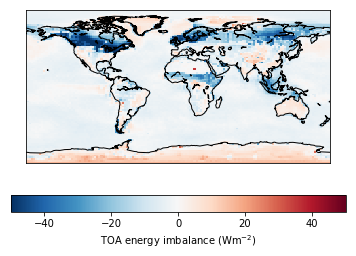

In [7]:
plt.set_cmap(cm.RdBu_r)
m=bmap(TOA_LGM-TOA_piC,vmin=-50,vmax=50,projection="cyl")
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"TOA energy imbalance (Wm$^{-2})$")
#plt.savefig("ForGavin/TOA.png")

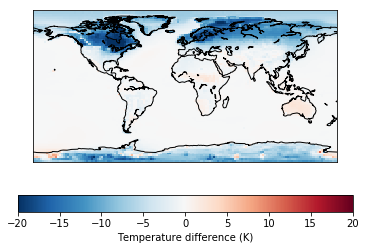

In [8]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_LGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf.png")

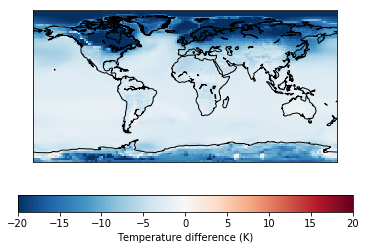

In [9]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_fullLGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf_full.png")

In [10]:
cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')
cdutil.averager(delta_tsurf,axis='xy')

variable_119
masked_array(data=-1.40804012,
             mask=False,
       fill_value=1e+20)

# Climate sensitivity
Using the q flux values (section 5, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013MS000265)

In [11]:
#GISS ECS = 3.1
ECS=2.9
F2x=4.1
lam=F2x/ECS
lam

1.4137931034482758

In [12]:
GISS_ERF=cdutil.averager(delta_TOA,axis='xy')+float(cdutil.averager(delta_tsurf,axis='xy'))*lam
print(GISS_ERF)

-6.701984424098186


In [13]:
lam_LGM=GISS_ERF/delta_tsurf_full

In [14]:
F2x/lam_LGM

3.0455937644694453

In [15]:
sorted(fpiC.variables.keys())

['C_lab',
 'C_lab_hemis',
 'EICB',
 'EICB_hemis',
 'ERVR',
 'ERVRO',
 'ERVRO_hemis',
 'ERVR_hemis',
 'F1LI',
 'F1LI_hemis',
 'FRMP',
 'FRMP_hemis',
 'H2O_from_CH4',
 'H2O_from_CH4_hemis',
 'HWV',
 'HWV_hemis',
 'IWPrad',
 'IWPrad_hemis',
 'L-O_TI',
 'L-O_TI_hemis',
 'LAI',
 'LAI_hemis',
 'LKICEWT',
 'LKICEWT_hemis',
 'LWPrad',
 'LWPrad_hemis',
 'MICB',
 'MICB_hemis',
 'MLTP',
 'MLTP_hemis',
 'MRVR',
 'MRVRO',
 'MRVRO_hemis',
 'MRVR_hemis',
 'PVS',
 'PVS_hemis',
 'RHsurf',
 'RHsurf_hemis',
 'RTSE',
 'RTSE_hemis',
 'SIMSFX',
 'SIMSFX_hemis',
 'SSI1',
 'SSI1_hemis',
 'SSI2',
 'SSI2_hemis',
 'TEMPSI',
 'TEMPSI_hemis',
 'TGO2',
 'TGO2_hemis',
 'TMAXC',
 'TMAXC_hemis',
 'TMAXE',
 'TMAXE_hemis',
 'TMINC',
 'TMINC_hemis',
 'TMNMX',
 'TMNMX_hemis',
 'TOC2',
 'TOC2_hemis',
 'Tatm',
 'Tatm_hemis',
 'Tmsu-TLT',
 'Tmsu-TLT_hemis',
 'Tmsu_TLS',
 'Tmsu_TLS_hemis',
 'Tmsu_TMT',
 'Tmsu_TMT_hemis',
 'Tssu_ch1',
 'Tssu_ch1_hemis',
 'Tssu_ch2',
 'Tssu_ch2_hemis',
 'Tssu_ch3',
 'Tssu_ch3_hemis',
 'ZSI',
 '

In [16]:
delta_low_cloud=fLGM("pcldl")-fpiC("pcldl")
delta_high_cloud=fLGM("pcldh")-fpiC("pcldh")

In [17]:
print(cdutil.averager(delta_low_cloud,axis='xy'))
print(cdutil.averager(delta_high_cloud,axis='xy'))



-0.37229658792427267
-0.49989810727985345


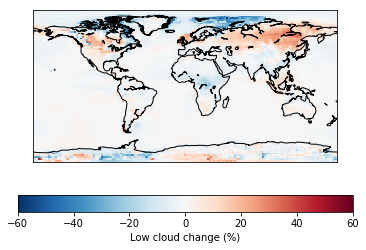

In [18]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_low_cloud,projection="cyl",vmin=-60,vmax=60)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Low cloud change (%)")
#plt.savefig("ForGavin/Lowcloud.png")

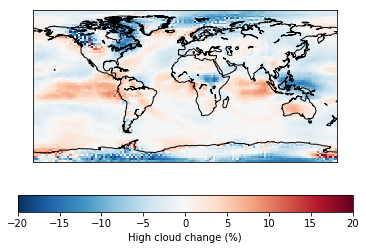

In [19]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_high_cloud,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"High cloud change (%)")
#plt.savefig("ForGavin/Highcloud.png")

In [20]:
def deltafixedSST(variable,full=False,remove_global_mean=False):
    if full:
        LGMvar=ffull(variable)
    else:
        LGMvar=fLGM(variable)
        
    piCvar=fpiC(variable)
    if remove_global_mean:
        LGMvar=LGMvar-cdutil.averager(LGMvar,axis='xy')
        piCvar=piCvar-cdutil.averager(piCvar,axis='xy')
    return LGMvar-piCvar
def plot_delta(variable,full=False,vmin=None,vmax=None,remove_global_mean=False,mask_land_ice=False):
    plt.figure()
    to_plot=deltafixedSST(variable,full=full,remove_global_mean=remove_global_mean)
    if mask_land_ice:
        landicechange=deltafixedSST("landicefr")
        to_plot=MV.masked_where(landicechange>99,to_plot)
    m=bmap(to_plot,projection="cyl",vmin=vmin,vmax=vmax)
    m.drawcoastlines()
    plt.colorbar(orientation="horizontal")

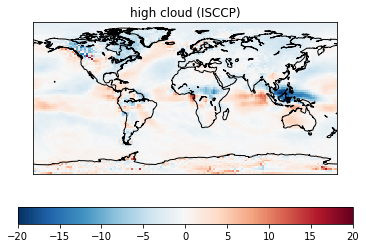

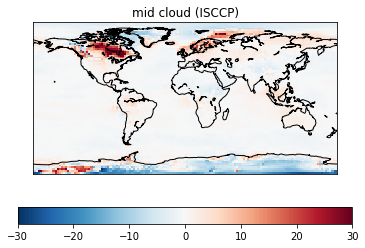

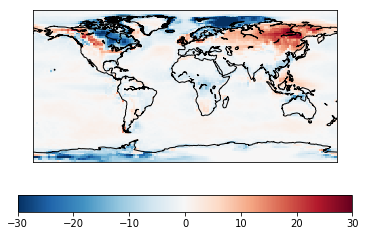

In [21]:
plot_delta("pcldh_isccp",vmin=-20,vmax=20)
plt.title("high cloud (ISCCP)")
plot_delta("pcldm_isccp",vmin=-30,vmax=30)
plt.title("mid cloud (ISCCP)")
plot_delta("pcldl_isccp",vmin=-30,vmax=30)

In [22]:
allvars=np.array(sorted(fLGM.variables.keys()))
for var in allvars[np.where([x.find("ice")>=0 for x in allvars])[0]]:
    try:
        print(var,fLGM[var].attributes["long_name"])
    except:
        print(var,"No long name")

botmlt_oice SEA ICE BASAL MELT RATE
botmlt_oice_hemis No long name
evap_lndice LAND ICE EVAPORATION
evap_lndice_hemis No long name
evap_oice OCEAN ICE EVAPORATION
evap_oice_hemis No long name
gice TOTAL EARTH ICE
gice_hemis No long name
grcong_oice SEA ICE CONGELATION GROWTH RATE
grcong_oice_hemis No long name
grfraz_oice SEA ICE FRAZIL GROWTH RATE
grfraz_oice_hemis No long name
grlat_oice SEA ICE LATERAL GROWTH RATE
grlat_oice_hemis No long name
hc_oice SEA ICE HEAT CONTENT
hc_oice_hemis No long name
icecld ICE CLOUD COVER
icecld_hemis No long name
imph_lndice IMPLICIT HEAT FLUX over LAND ICE
imph_lndice_hemis No long name
impm_lndice IMPLICIT MASS FLUX over LAND ICE
impm_lndice_hemis No long name
landicefr LAND ICE FRACTION
landicefr_hemis No long name
latht_lndice LATENT HEAT FLUX OVER LAND ICE
latht_lndice_hemis No long name
lwd_oice SEA ICE DOWNWARD LONGWAVE RADIATION
lwd_oice_hemis No long name
lwu_oice SEA ICE UPWARD LONGWAVE RADIATION
lwu_oice_hemis No long name
netht_lndice NE

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


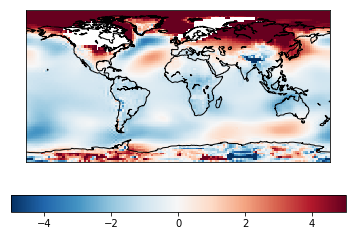

In [23]:
plot_delta("slp",full=True,remove_global_mean=True,vmin=-5,vmax=5,mask_land_ice=True)

In [24]:
datadirec

'/Volumes/SahelData/LGM/'

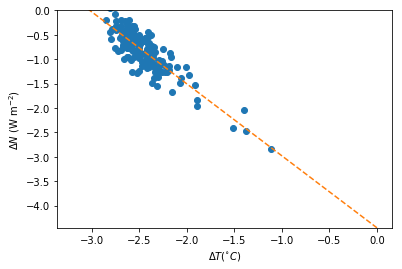

In [44]:
#0.5 toa
def get_abrupt0p5(variable,model="GISS-E2-1-G"):
    #abrupt0p5direc="/Users/kmarvel/Documents/DATA/LGM/abrupt-0p5xCO2/"+model+"/"
    abrupt0p5direc=datadirec+"abrupt-0p5xCO2/"+model+"/"
    vfiles=sorted(glob.glob(abrupt0p5direc+"*"+variable+"*"))
    fv=cdms.open(vfiles[0])
    data=cdutil.averager(fv(variable),axis='xy')
    fv.close()
    if len(vfiles)>1:
        for fil in vfiles[1:]:
            fv=cdms.open(fil)
            mdata=cdutil.averager(fv(variable),axis='xy')
            data=MV.concatenate((data,mdata))
            fv.close()

    cdutil.setTimeBoundsMonthly(data)
    return data

rsdt0p5=get_abrupt0p5("rsdt")
rsut0p5=get_abrupt0p5("rsut")
rlut0p5=get_abrupt0p5("rlut")
TOA0p5=rsdt0p5-(rsut0p5+rlut0p5)
T0p5=get_abrupt0p5("tas")-273.15



y=cdutil.YEAR(TOA0p5)-cdutil.averager(TOA_piC,axis='xy')
x=cdutil.YEAR(T0p5)-cdutil.averager(tsurf_piC,axis='xy')


plt.figure()
plt.plot(x.asma(),y.asma(),"o")
p=np.polyfit(x,y,1)
xn=np.arange(-3.2,0.1,.1)
plt.plot(xn,np.polyval(p,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')
np.polyval(p,0.)
#plt.xlim(-3.2,0)
plt.ylim(p[1],0)
plt.savefig("/Users/kmarvel/Desktop/A0p5CO2.png")
lam,Fcing=p
ECS0p5=Fcing/-lam




In [28]:
sorted(fLGM.variables)

['C_lab',
 'C_lab_hemis',
 'EICB',
 'EICB_hemis',
 'ERVR',
 'ERVRO',
 'ERVRO_hemis',
 'ERVR_hemis',
 'F1LI',
 'F1LI_hemis',
 'FRMP',
 'FRMP_hemis',
 'H2O_from_CH4',
 'H2O_from_CH4_hemis',
 'HWV',
 'HWV_hemis',
 'IWPrad',
 'IWPrad_hemis',
 'L-O_TI',
 'L-O_TI_hemis',
 'LAI',
 'LAI_hemis',
 'LKICEWT',
 'LKICEWT_hemis',
 'LWPrad',
 'LWPrad_hemis',
 'MICB',
 'MICB_hemis',
 'MLTP',
 'MLTP_hemis',
 'MRVR',
 'MRVRO',
 'MRVRO_hemis',
 'MRVR_hemis',
 'PVS',
 'PVS_hemis',
 'RHsurf',
 'RHsurf_hemis',
 'RTSE',
 'RTSE_hemis',
 'SIMSFX',
 'SIMSFX_hemis',
 'SSI1',
 'SSI1_hemis',
 'SSI2',
 'SSI2_hemis',
 'TEMPSI',
 'TEMPSI_hemis',
 'TGO2',
 'TGO2_hemis',
 'TMAXC',
 'TMAXC_hemis',
 'TMAXE',
 'TMAXE_hemis',
 'TMINC',
 'TMINC_hemis',
 'TMNMX',
 'TMNMX_hemis',
 'TOC2',
 'TOC2_hemis',
 'Tatm',
 'Tatm_hemis',
 'Tmsu-TLT',
 'Tmsu-TLT_hemis',
 'Tmsu_TLS',
 'Tmsu_TLS_hemis',
 'Tmsu_TMT',
 'Tmsu_TMT_hemis',
 'Tssu_ch1',
 'Tssu_ch1_hemis',
 'Tssu_ch2',
 'Tssu_ch2_hemis',
 'Tssu_ch3',
 'Tssu_ch3_hemis',
 'ZSI',
 '

In [29]:
fLGM['lwcrf_toa'].attributes

{'missing_value': 1e+20,
 'units': 'W/m^2',
 'long_name': 'LW CLOUD RADIATIVE FORCING, TOA'}

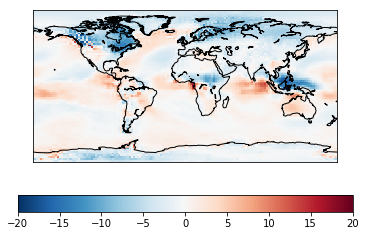

In [30]:
plot_delta("lwcrf_toa",vmin=-20,vmax=20)

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)
/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which w

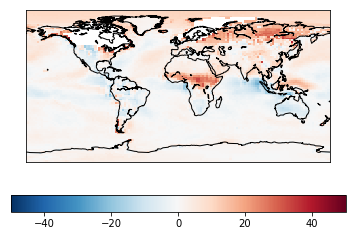

In [45]:
plot_delta("swcrf_toa",vmin=-50,vmax=50,mask_land_ice=True)

In [32]:
cdutil.averager(deltafixedSST("swcrf_toa"),axis='xy')

variable_5260
masked_array(data=2.80676421,
             mask=False,
       fill_value=1e+20)

In [33]:
cdutil.averager(deltafixedSST("lwcrf_toa"),axis='xy')

variable_5288
masked_array(data=-0.36148331,
             mask=False,
       fill_value=1e+20)

In [34]:
landicechange=deltafixedSST("landicefr")
#np.where(landicechange>99)
cdutil.averager(MV.masked_where(landicechange>99,deltafixedSST("swcrf_toa")),axis='xy')

variable_5329
masked_array(data=1.64089173,
             mask=False,
       fill_value=1e+20)

'W/m2/K/100hPa'

In [49]:
f.variables

{'p_mean': <cdms2.fvariable.FileVariable at 0x124ce48d0>,
 'p_bounds': <cdms2.fvariable.FileVariable at 0x124ce4908>,
 'p_thickness': <cdms2.fvariable.FileVariable at 0x124ce49e8>,
 'tsurf_lw': <cdms2.fvariable.FileVariable at 0x124ce4898>,
 'tsurf_lw_cs': <cdms2.fvariable.FileVariable at 0x124ce4828>,
 'albedo_sw': <cdms2.fvariable.FileVariable at 0x124ce4978>,
 'albedo_sw_cs': <cdms2.fvariable.FileVariable at 0x124ce49b0>,
 'ta_lw': <cdms2.fvariable.FileVariable at 0x124ce4940>,
 'ta_lw_cs': <cdms2.fvariable.FileVariable at 0x124ce4a20>,
 'q_lw': <cdms2.fvariable.FileVariable at 0x124ce4a58>,
 'q_lw_cs': <cdms2.fvariable.FileVariable at 0x124ce4a90>,
 'q_sw': <cdms2.fvariable.FileVariable at 0x124ce4ac8>,
 'q_sw_cs': <cdms2.fvariable.FileVariable at 0x124ce4b00>}

In [50]:
datadirec+

'/Volumes/SahelData/LGM/'